## Part 1 EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('../../datasets/titanic/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

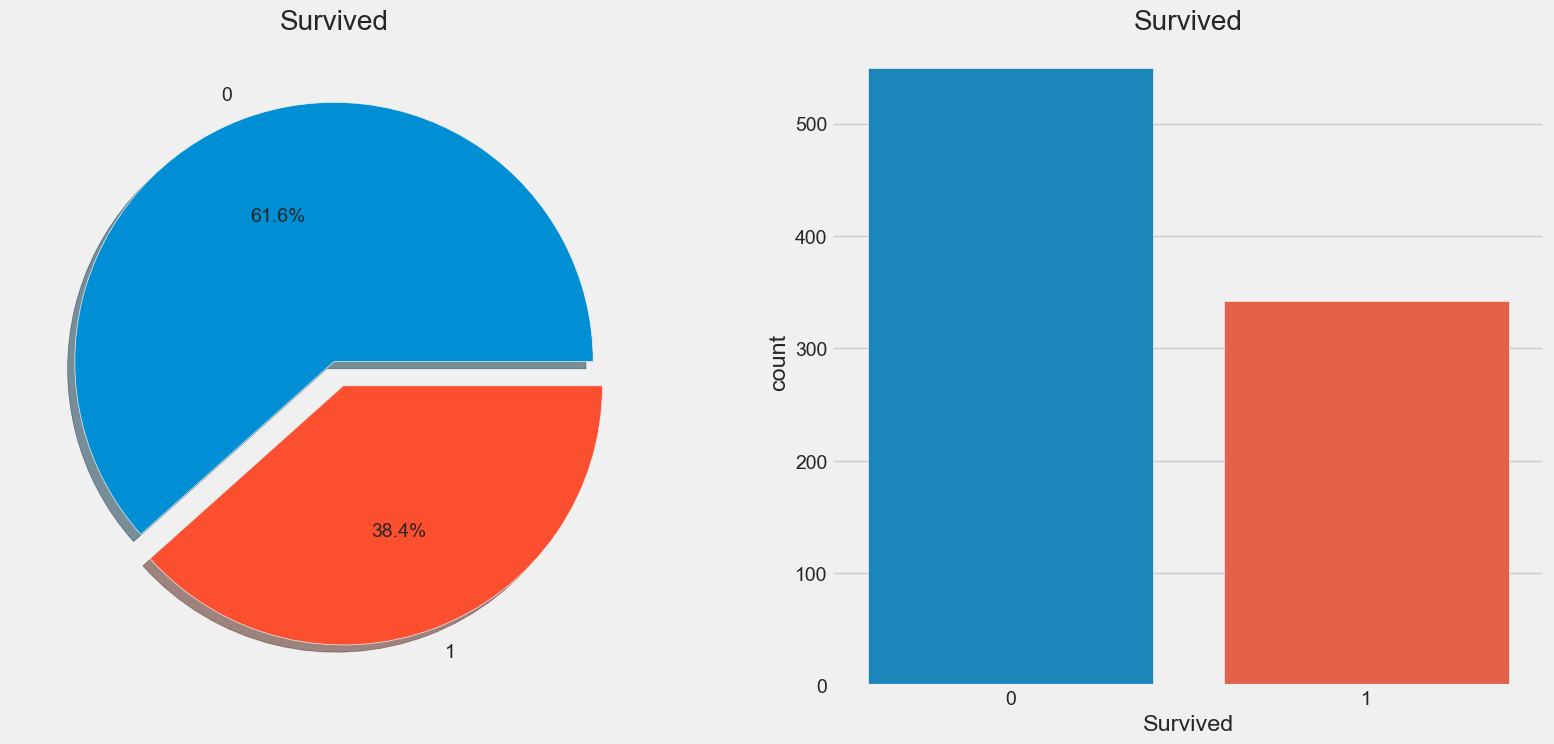

In [5]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',
                                         ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot(x='Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')

plt.show()

In [6]:
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

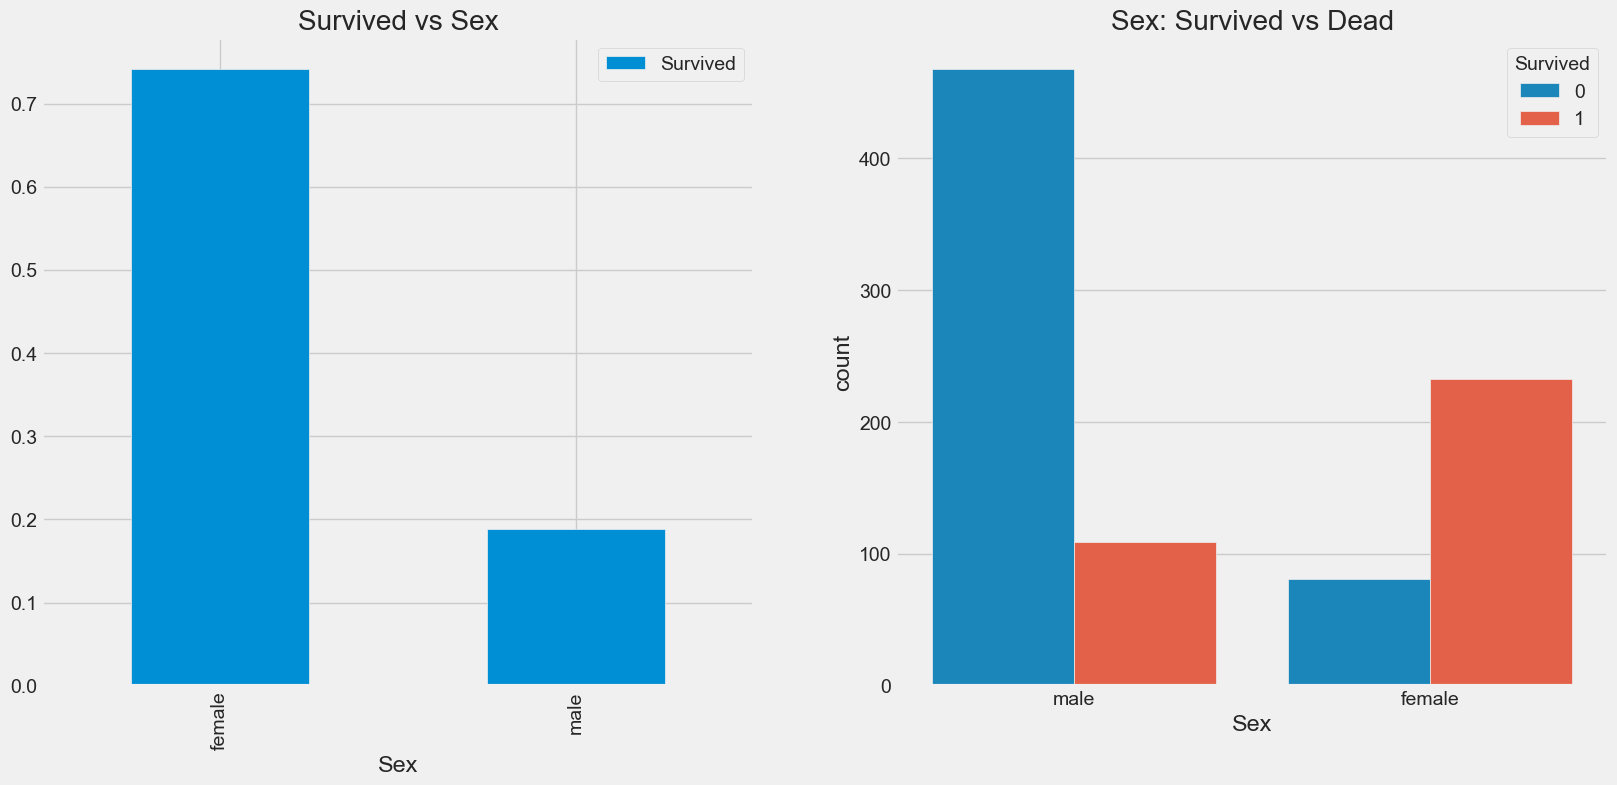

In [7]:
f,ax = plt.subplots(1,2,figsize=(18,8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show();

In [8]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


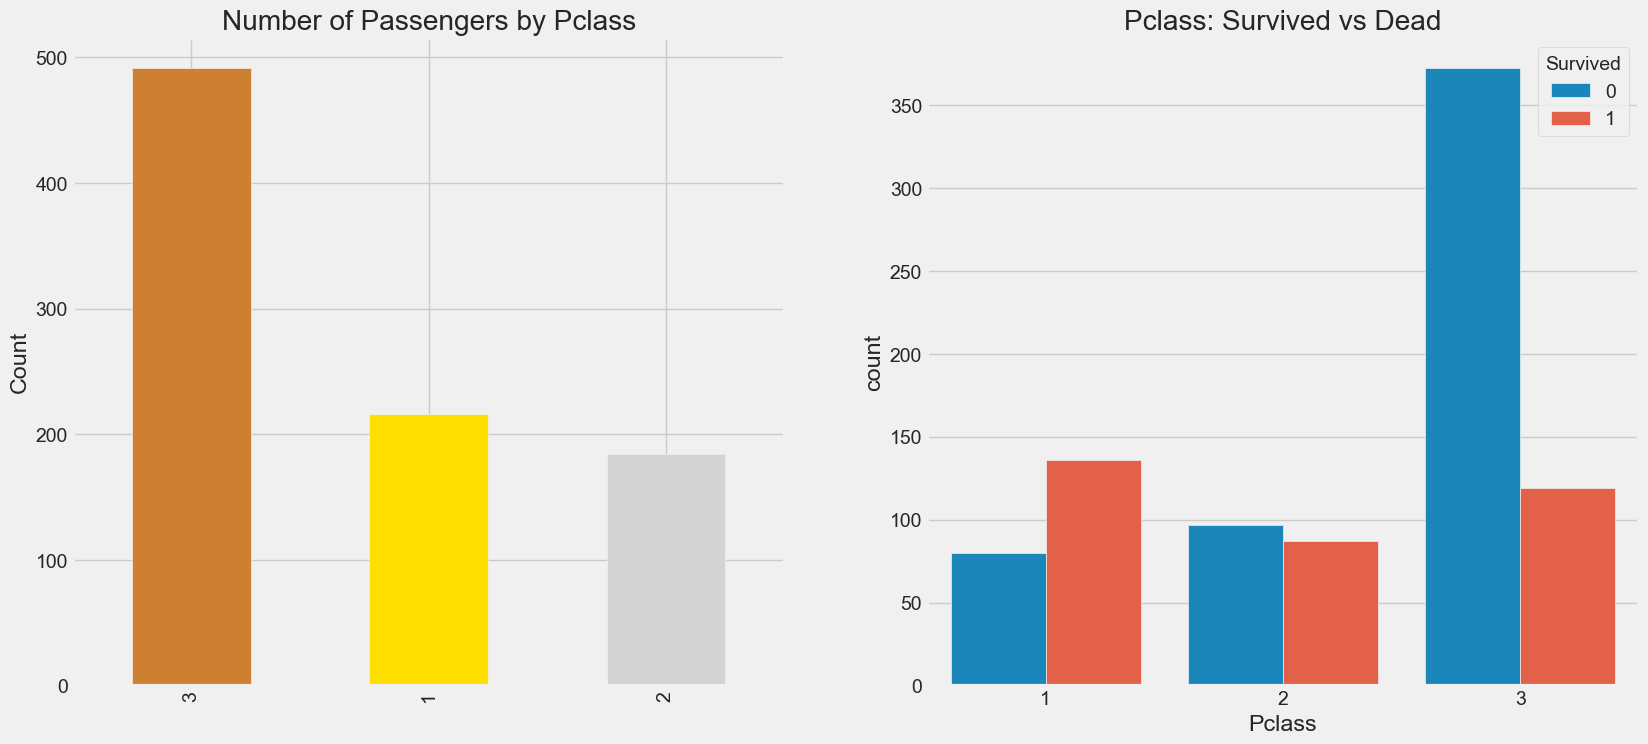

In [9]:
f,ax = plt.subplots(1,2, figsize=(18,8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

sns.countplot(x='Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

In [10]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

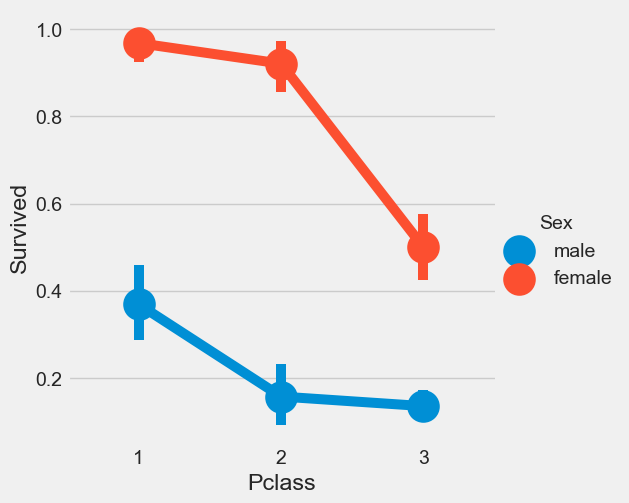

In [11]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

In [12]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


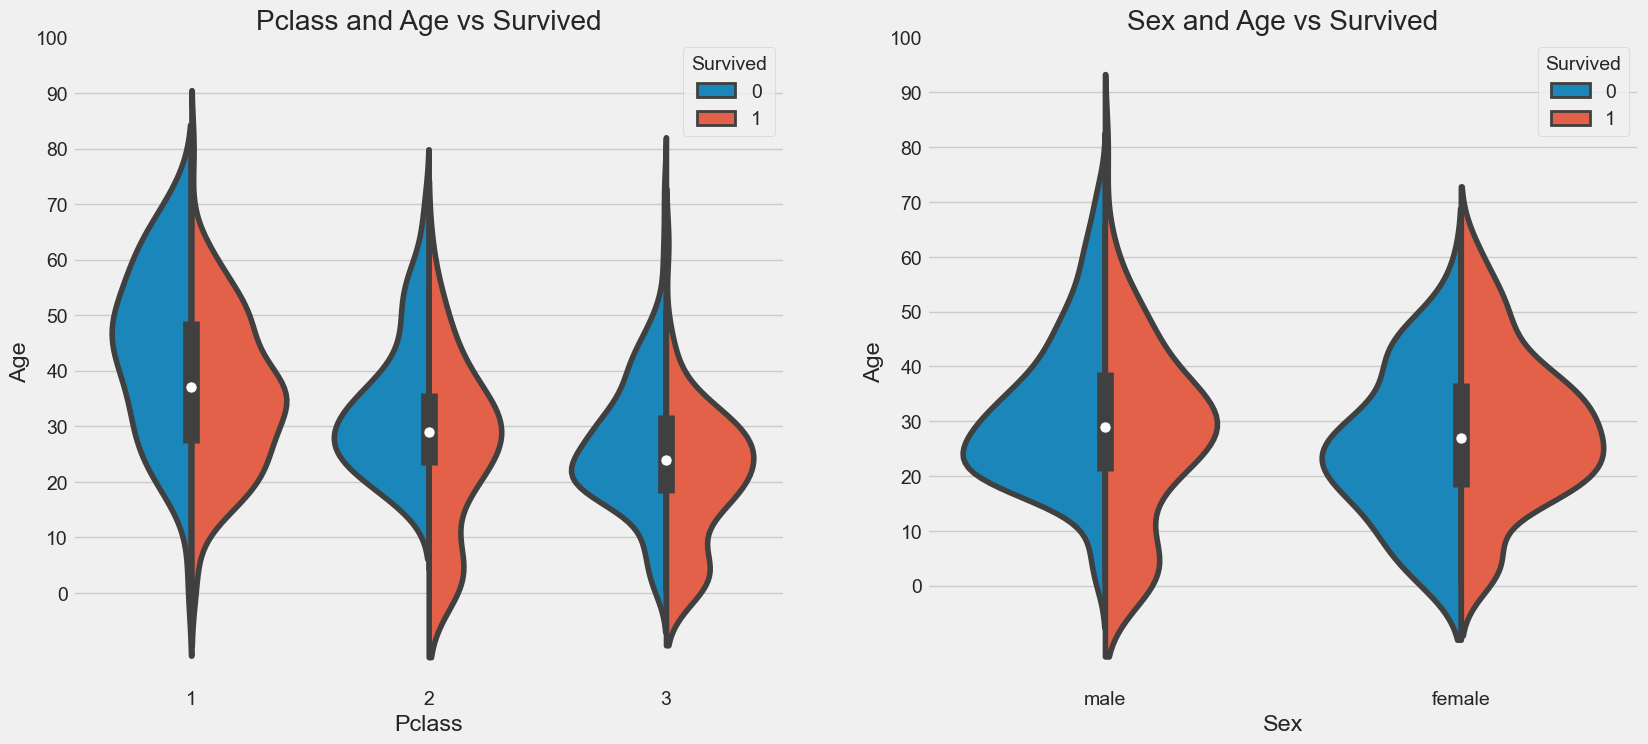

In [13]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))

plt.show();

In [17]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [18]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [21]:
pd.crosstab(data.Initial, data.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [22]:
data['Initial'].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess',
                         'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                        ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs',
                         'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'], inplace=True)

In [23]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [24]:
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull()) & (data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial=='Other'), 'Age'] = 46

In [25]:
data.Age.isnull().any()

False

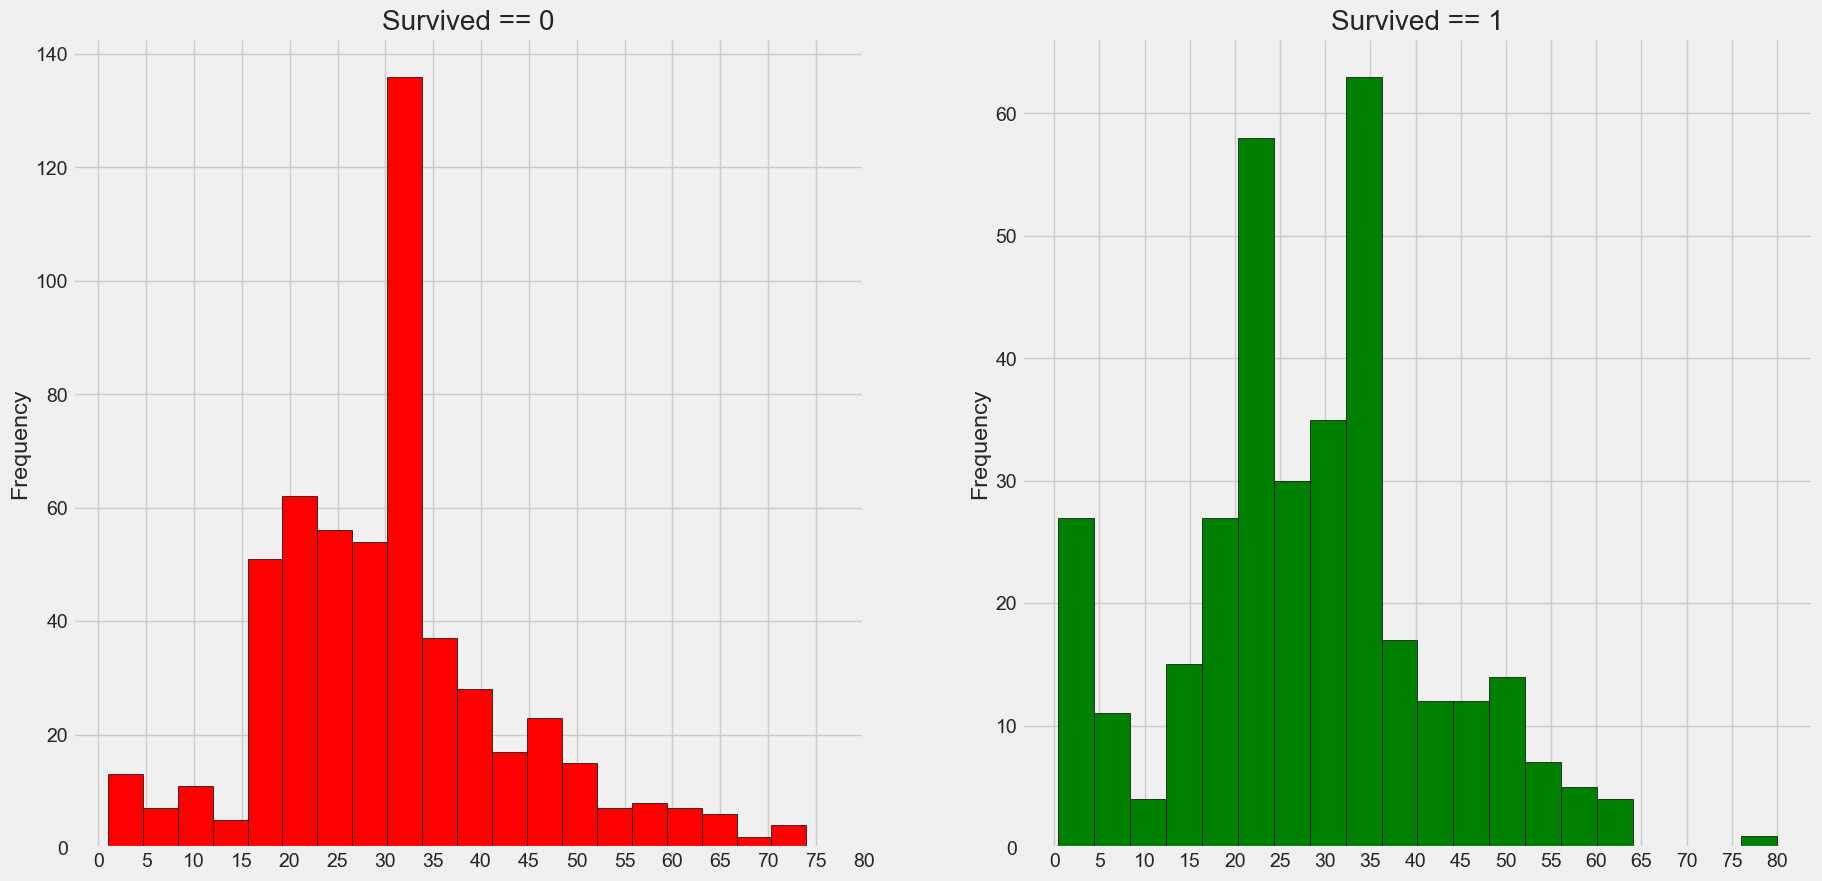

In [26]:
f,ax = plt.subplots(1,2,figsize=(20,10))

data[data['Survived']==0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived == 0')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

data[data['Survived']==1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived == 1')
x2 = list(range(0,85,5))
ax[1].set_xticks(x2)

plt.show();

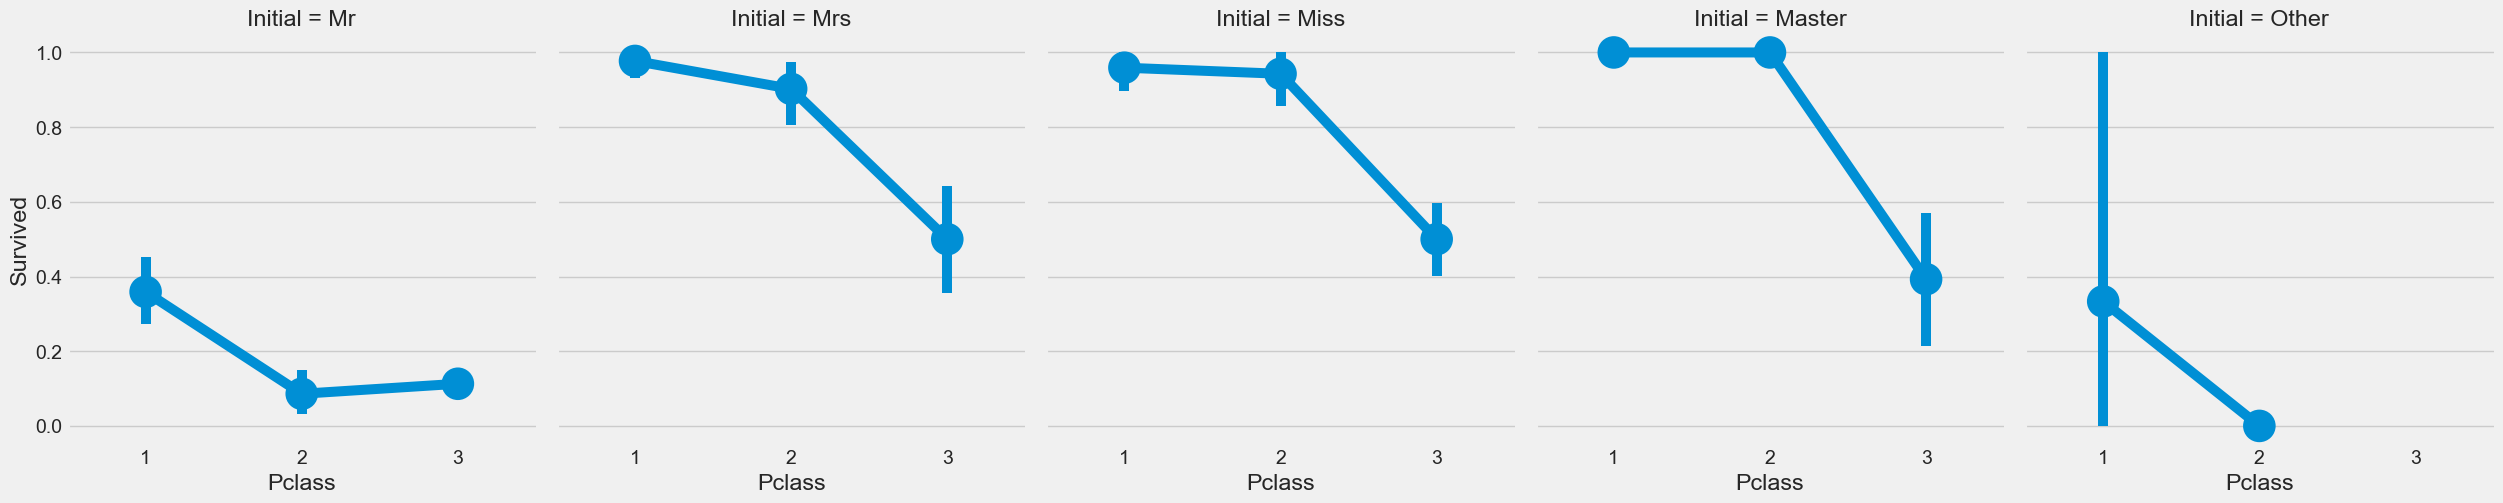

In [27]:
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

In [28]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True)

Sex             female      male       All
Survived             0    1    0    1     
Embarked Pclass                           
C        1           1   42   25   17   85
         2           0    7    8    2   17
         3           8   15   33   10   66
Q        1           0    1    1    0    2
         2           0    2    1    0    3
         3           9   24   36    3   72
S        1           2   46   51   28  127
         2           6   61   82   15  164
         3          55   33  231   34  353
All                 81  231  468  109  889

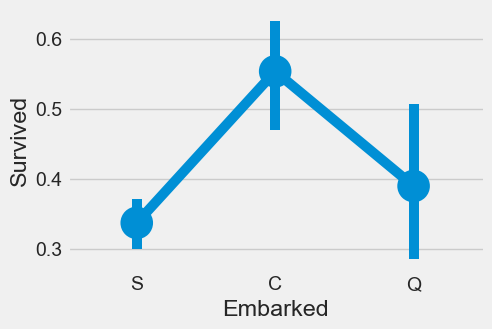

In [29]:
sns.factorplot('Embarked', 'Survived', data=data)
fig=plt.gcf()
fig.set_size_inches(5,3)
plt.show()

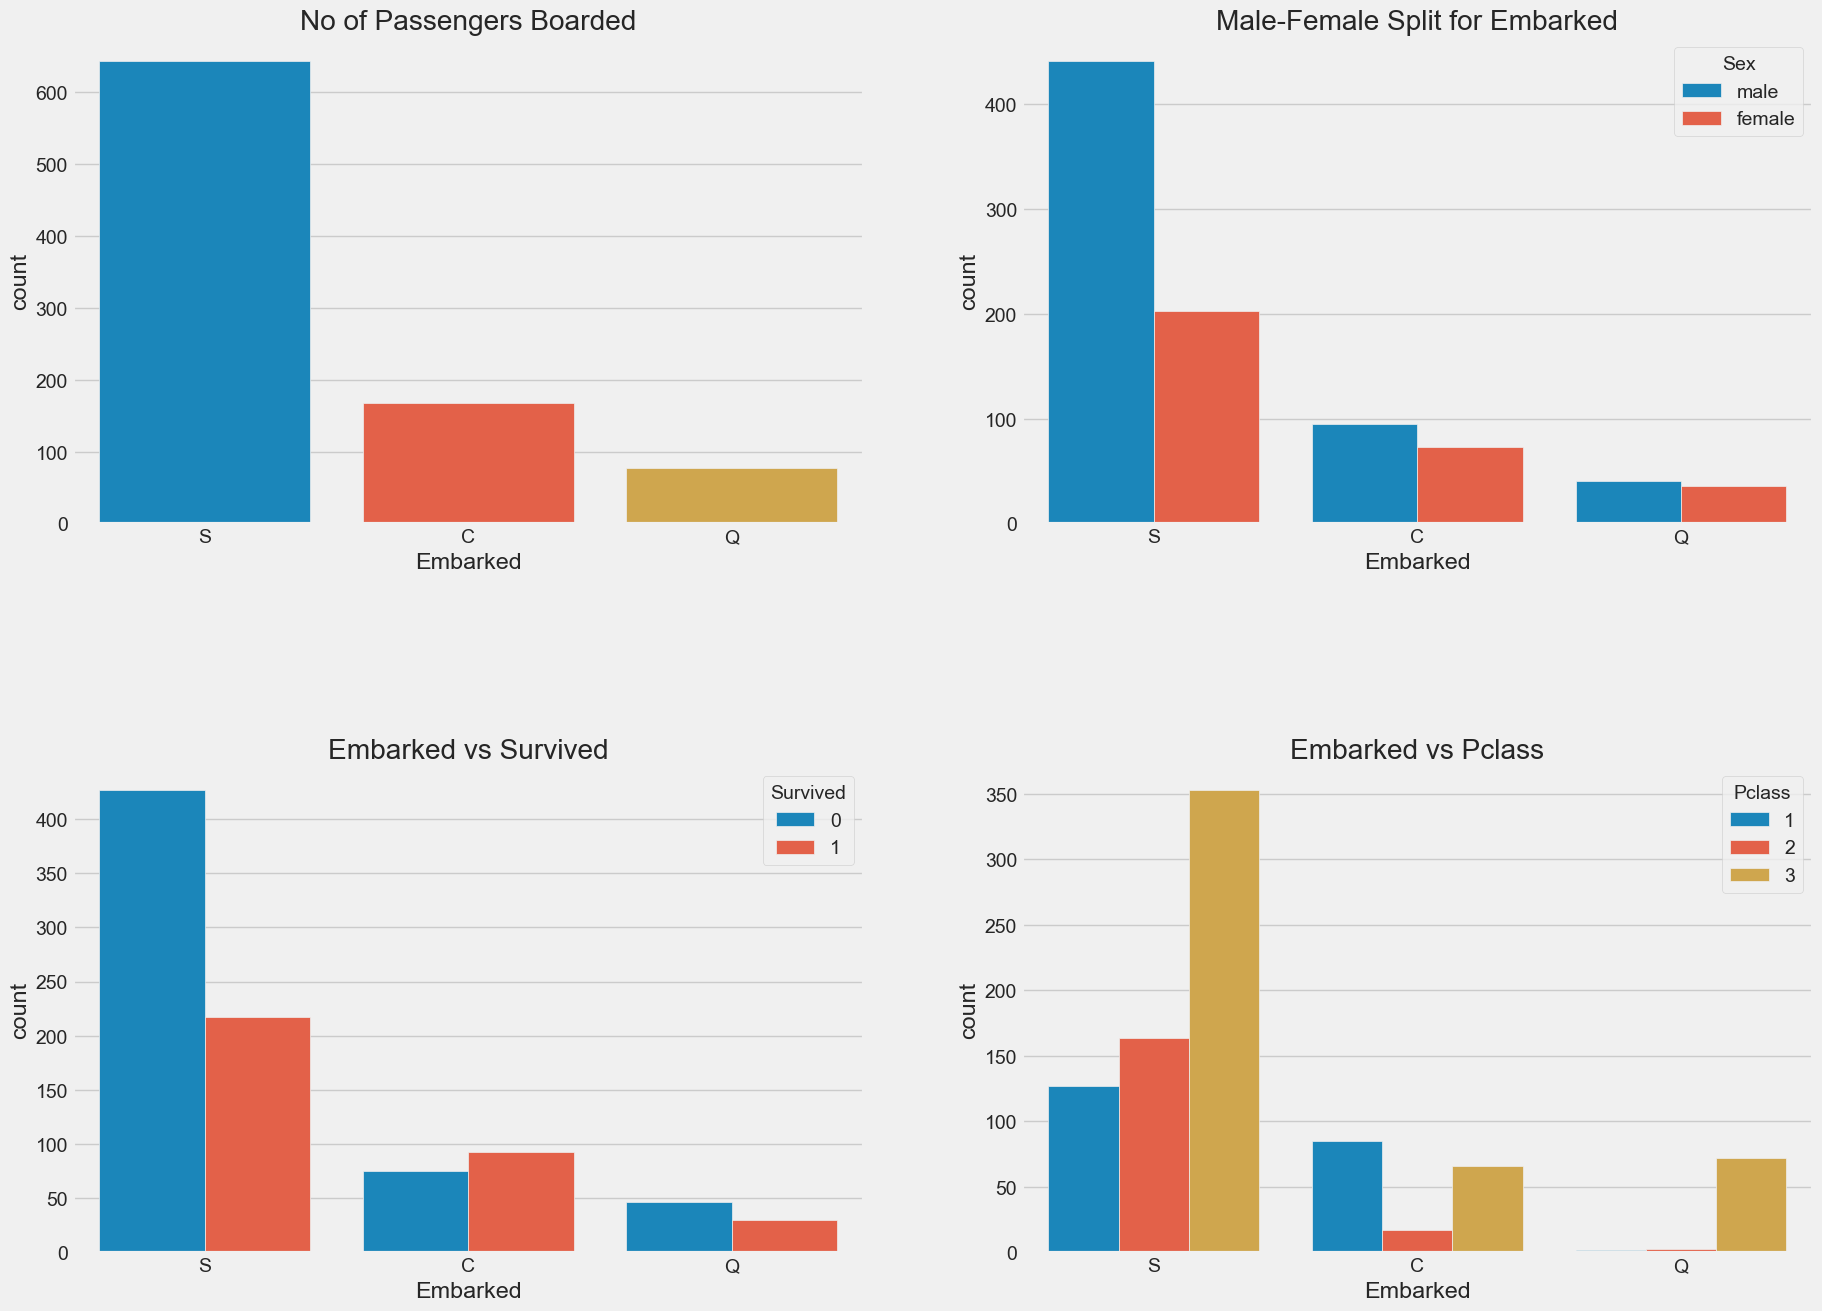

In [30]:
f,ax = plt.subplots(2,2,figsize=(20,15))

sns.countplot('Embarked', data=data, ax=ax[0,0])
ax[0,0].set_title('No of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

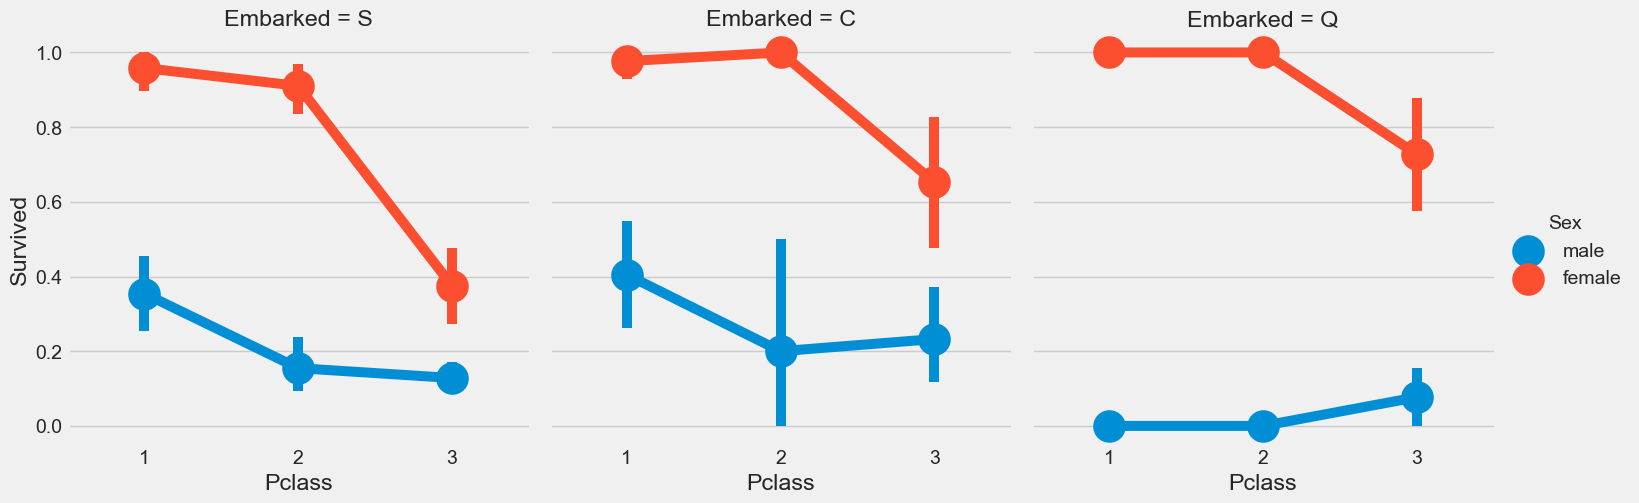

In [31]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)

In [34]:
data['Embarked'].fillna('S', inplace=True)

In [35]:
data.Embarked.isnull().any()

False

In [36]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


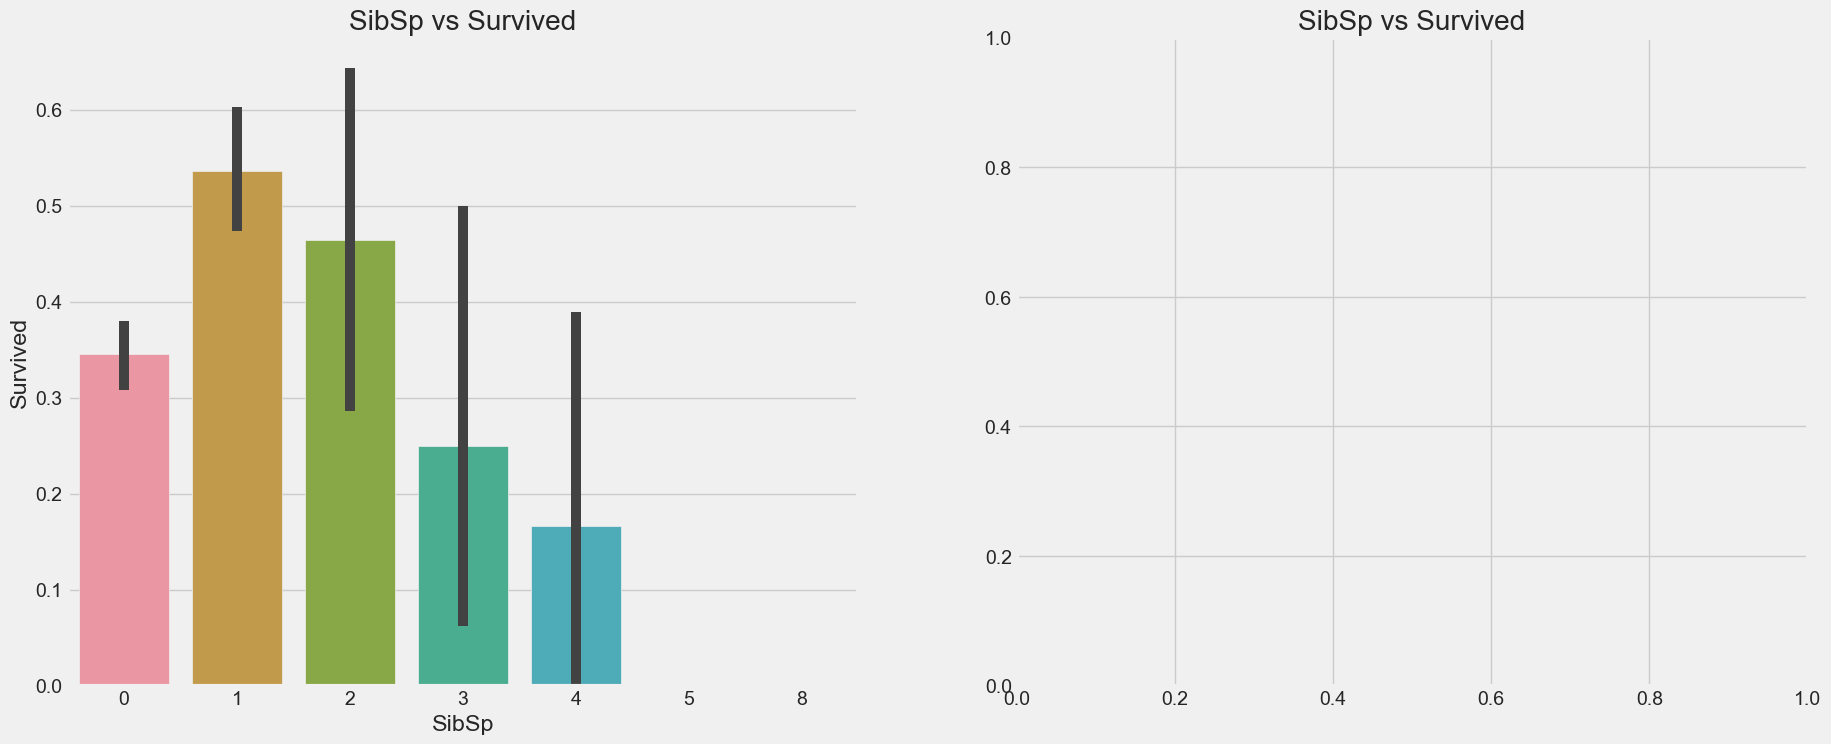

In [39]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp', 'Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp', 'Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)
plt.show()

In [40]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


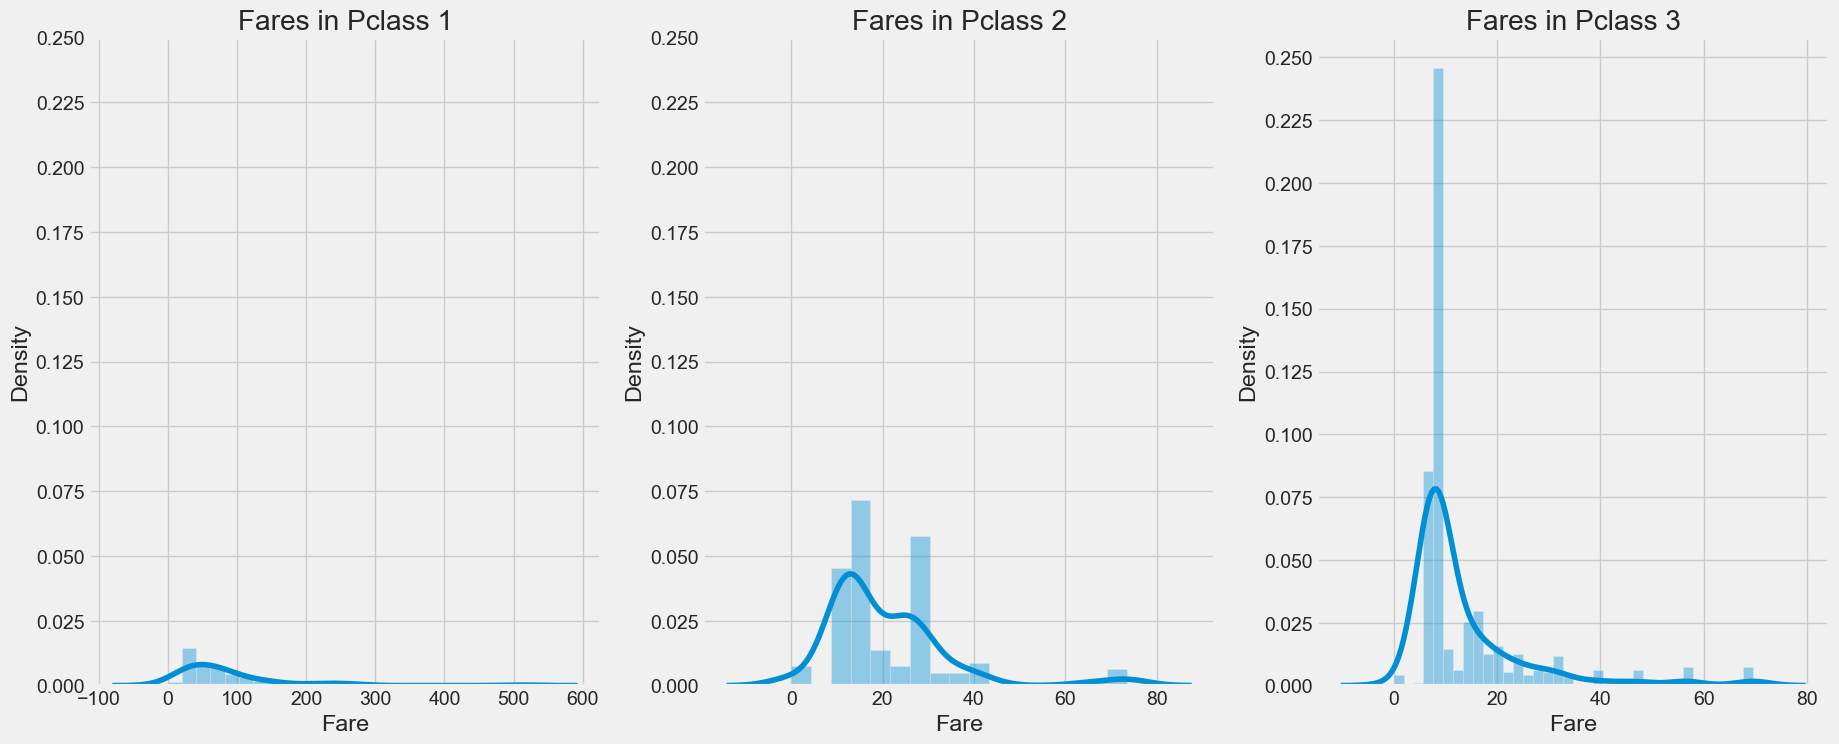

In [54]:
f,ax = plt.subplots(1,3,figsize=(20,8))

sns.distplot(data[data['Pclass']==1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
ax[0].set_yticks(np.linspace(0,0.25,11))

sns.distplot(data[data['Pclass']==2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
ax[1].set_yticks(np.linspace(0,0.25,11))

sns.distplot(data[data['Pclass']==3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
ax[2].set_yticks(np.linspace(0,0.25,11))

plt.show();

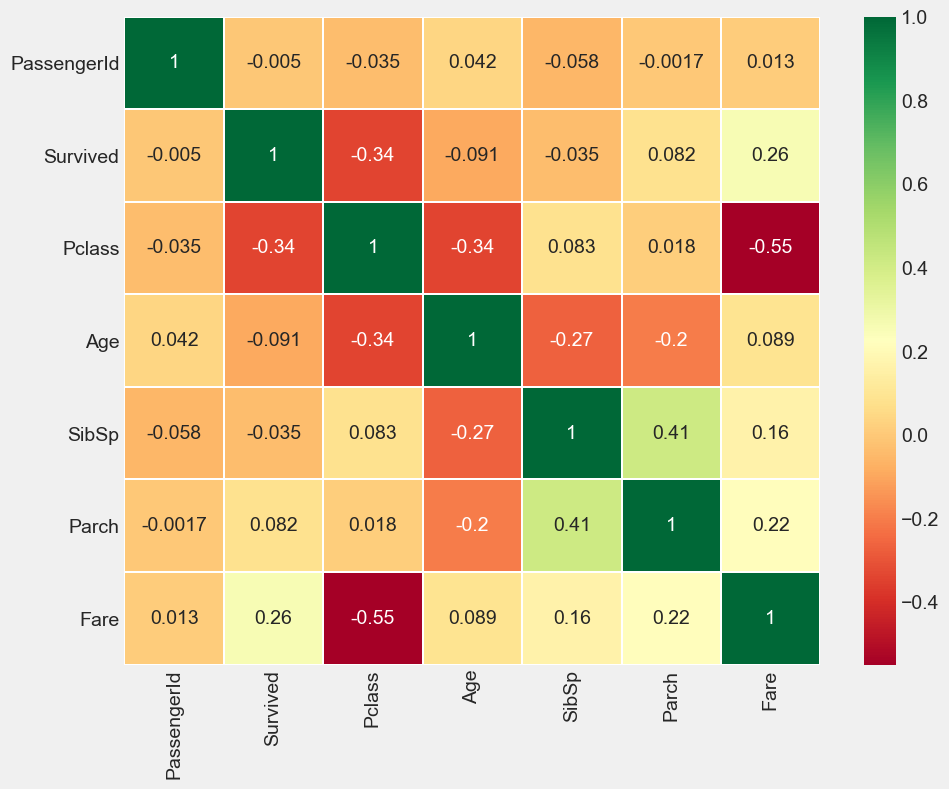

In [55]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)

fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show();

In [57]:
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16) & (data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32) & (data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48) & (data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4

data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [61]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,382
2,325
0,104
3,69
4,11


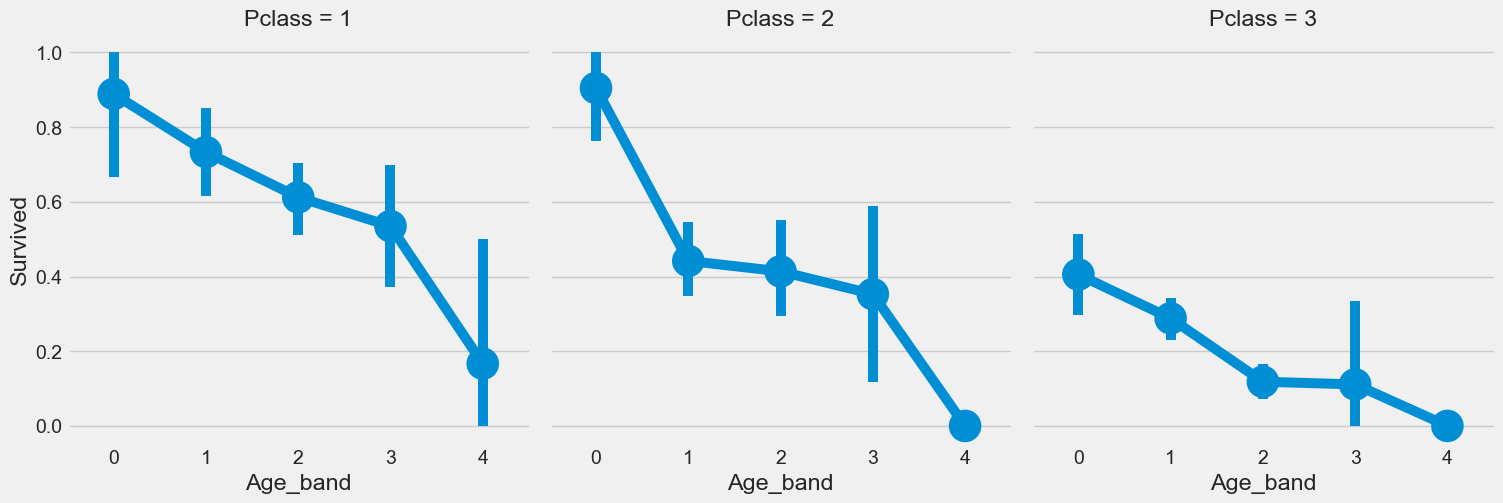

In [62]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show();

In [64]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

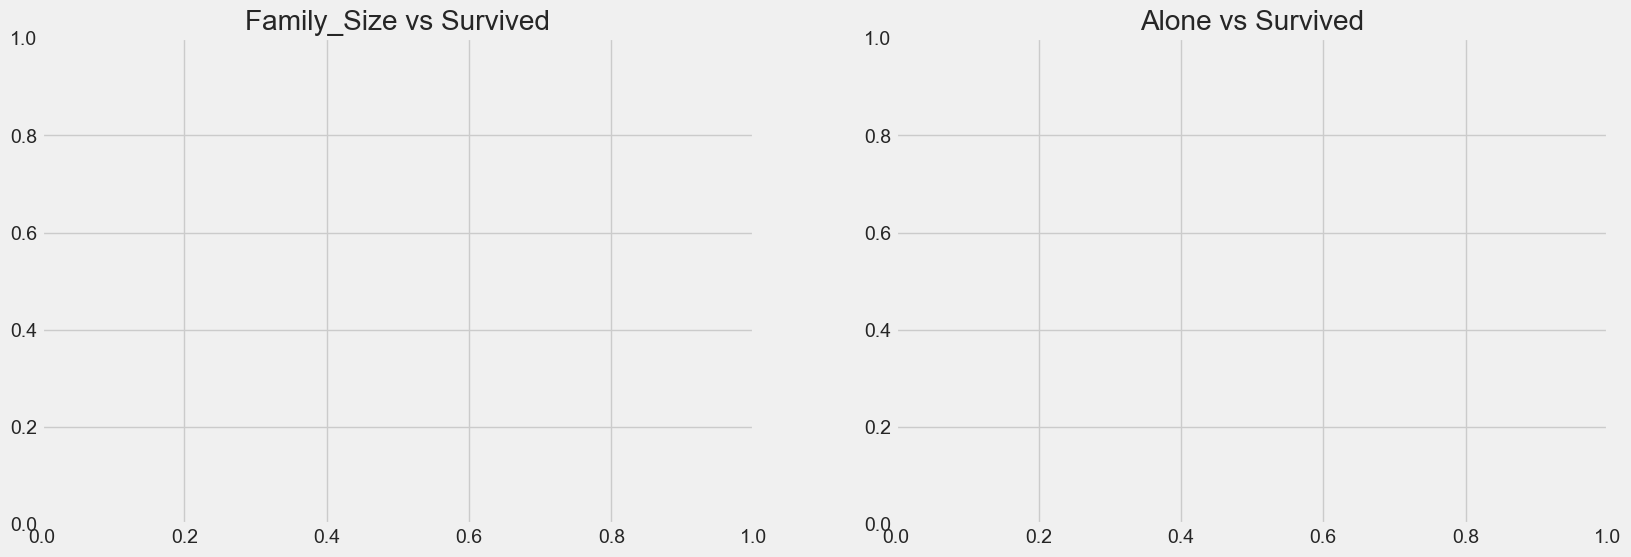

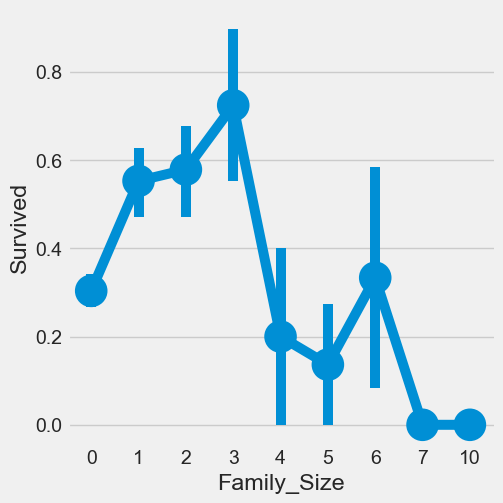

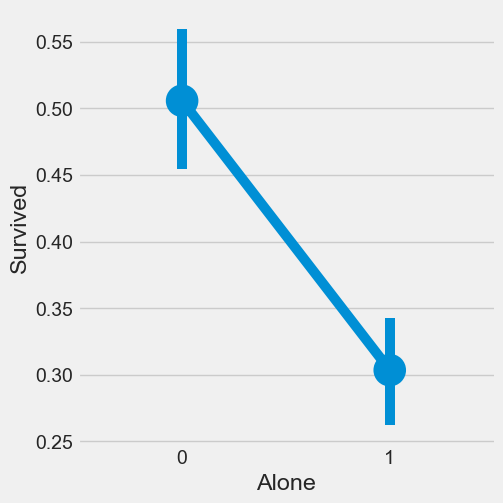

In [67]:
f, ax = plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show();

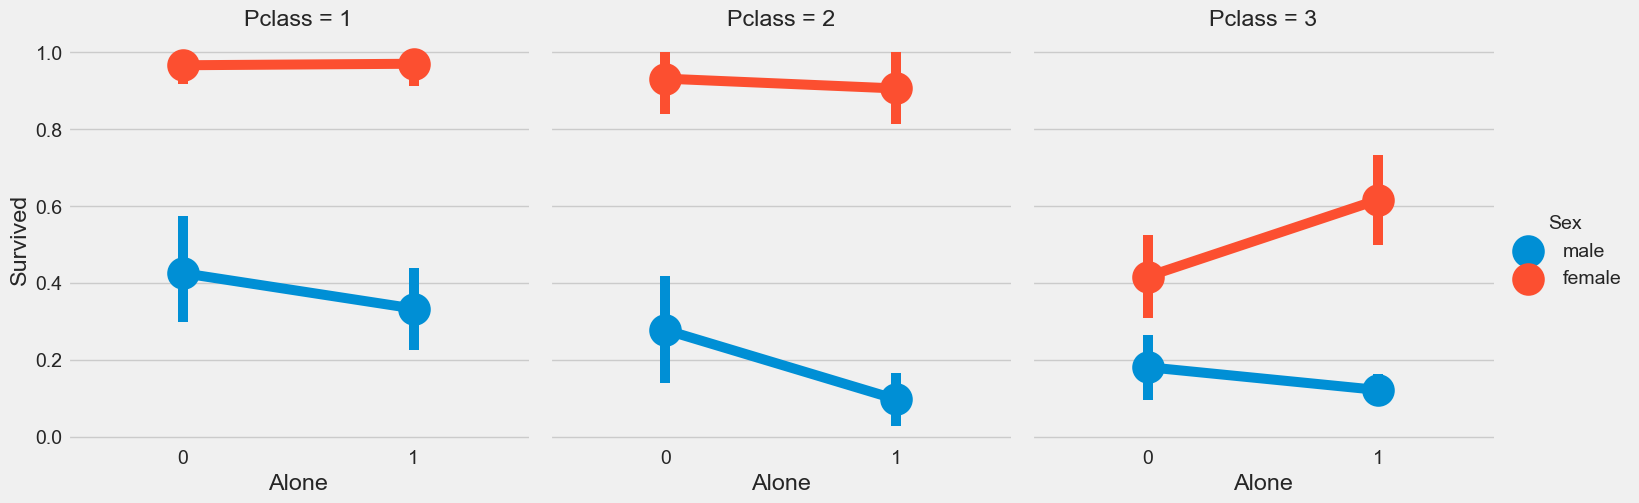

In [68]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')

In [69]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)

In [72]:
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [73]:
data['Fare_cat'] = 0
data.loc[data['Fare']<= 7.91, 'Fare_cat'] = 0
data.loc[(data['Fare']>7.91) & (data['Fare'] <= 14.454), 'Fare_cat'] = 1
data.loc[(data['Fare']>14.454) & (data['Fare'] <= 31), 'Fare_cat'] = 2
data.loc[(data['Fare']>31) & (data['Fare']<=513), 'Fare_cat'] = 3

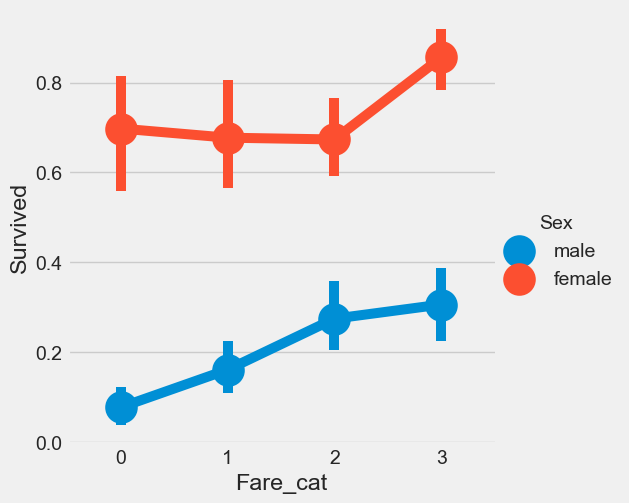

In [74]:
sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

In [75]:
data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)

In [76]:
data['Embarked'].replace(['S', 'C', 'Q'], [0,1,2], inplace=True)

In [77]:
data['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], [0,1,2,3,4], inplace=True)

In [78]:
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

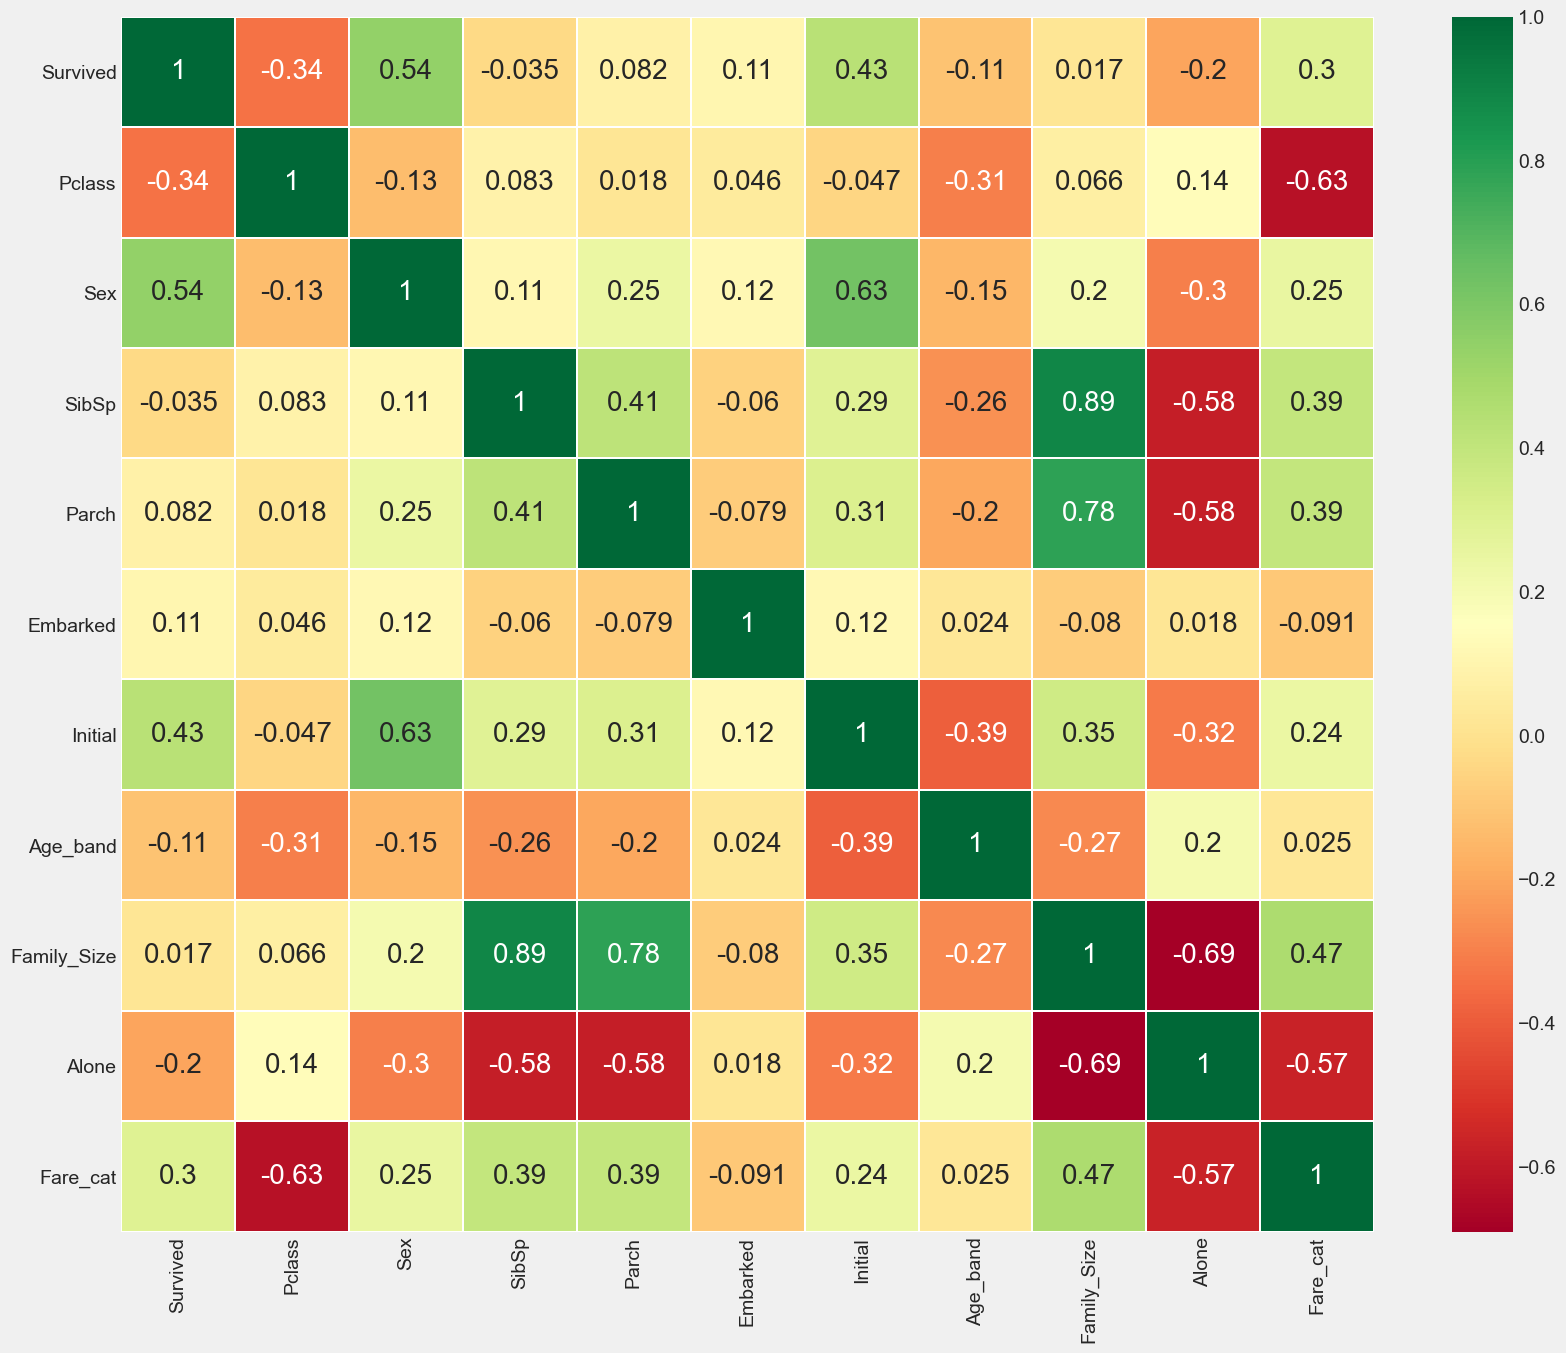

In [79]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18, 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [80]:
from sklearn. linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [86]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

## SVM

In [87]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)

print('Accurary for rbf SVM is ', metrics.accuracy_score(prediction1, test_Y))

Accurary for rbf SVM is  0.835820895522388


In [88]:
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is ', metrics.accuracy_score(prediction2, test_Y))

Accuracy for linear SVM is  0.8171641791044776


## Logistic Regression

In [89]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is ', metrics.accuracy_score(prediction3, test_Y))

The accuracy of the Logistic Regression is  0.8134328358208955


## Decision Tree

In [90]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is ', metrics.accuracy_score(prediction4, test_Y))

The accuracy of the Decision Tree is  0.8059701492537313


## KNN

In [93]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is ', metrics.accuracy_score(prediction5, test_Y))

The accuracy of the KNN is  0.8134328358208955


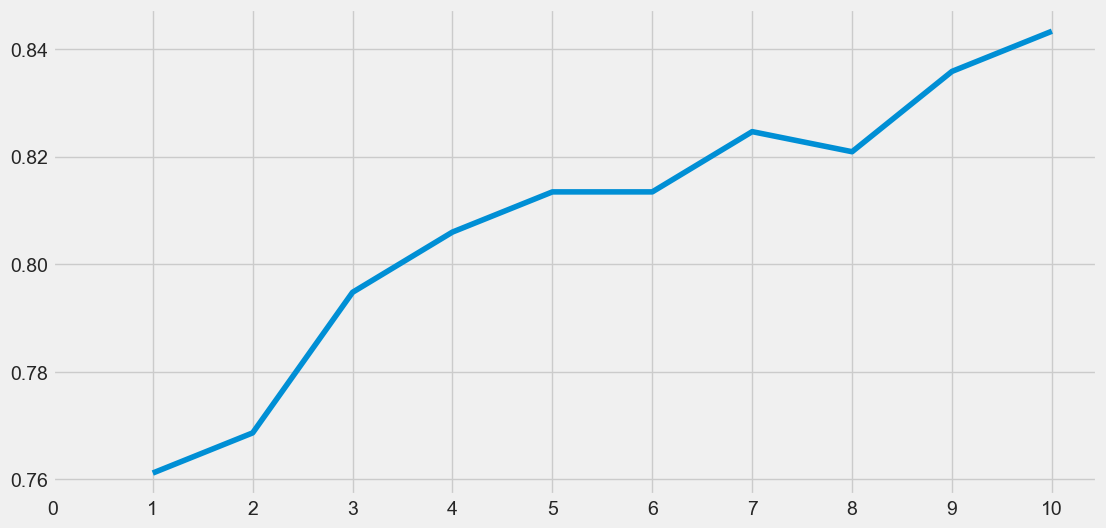

Accuracies for different values of n are: [0.76119403 0.76865672 0.79477612 0.80597015 0.81343284 0.81343284
 0.82462687 0.82089552 0.8358209  0.84328358] with the max value as  0.8432835820895522


In [99]:
a_index = list(range(1,11))
a = pd.Series()
x = list(range(0,11))

for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Accuracies for different values of n are:', a.values, 'with the max value as ', a.values.max())

## Naive Bayes

In [100]:
model = GaussianNB()
model.fit(train_X, train_Y)

prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is', metrics.accuracy_score(prediction6, test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


## Random Forests

In [101]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)

prediction7 = model.predict(test_X)

print('The accuracy of the Random Forests is', metrics.accuracy_score(prediction7, test_Y))

The accuracy of the Random Forests is 0.8022388059701493


## CV

In [104]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

kfold = KFold(n_splits=10, random_state=22, shuffle=True)

xyz = []
accuracy = []
std = []
classifiers = ['Linear SVM', 'Radial SVM', 'Logistic Regression', 'KNN', 'Decision Tree', 'Naive Bayes', 'Random Forest']

models = [svm.SVC(kernel='linear'), svm.SVC(kernel='rbf'), LogisticRegression(), KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(), GaussianNB(), RandomForestClassifier(n_estimators=100)]

for i in models:
    model = i
    cv_result = cross_val_score(model, X, Y, cv=kfold, scoring='accuracy')
    cv_result = cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)

new_models_dataframe2 = pd.DataFrame({'CV Mean' : xyz, 'Std': std}, index=classifiers)

new_models_dataframe2

,CV Mean,Std
Linear SVM,0.784607,0.057841
Radial SVM,0.828377,0.057096
Logistic Regression,0.799176,0.040154
KNN,0.812634,0.041063
Decision Tree,0.808102,0.044113
Naive Bayes,0.795843,0.054861
Random Forest,0.814894,0.053561


<AxesSubplot: >

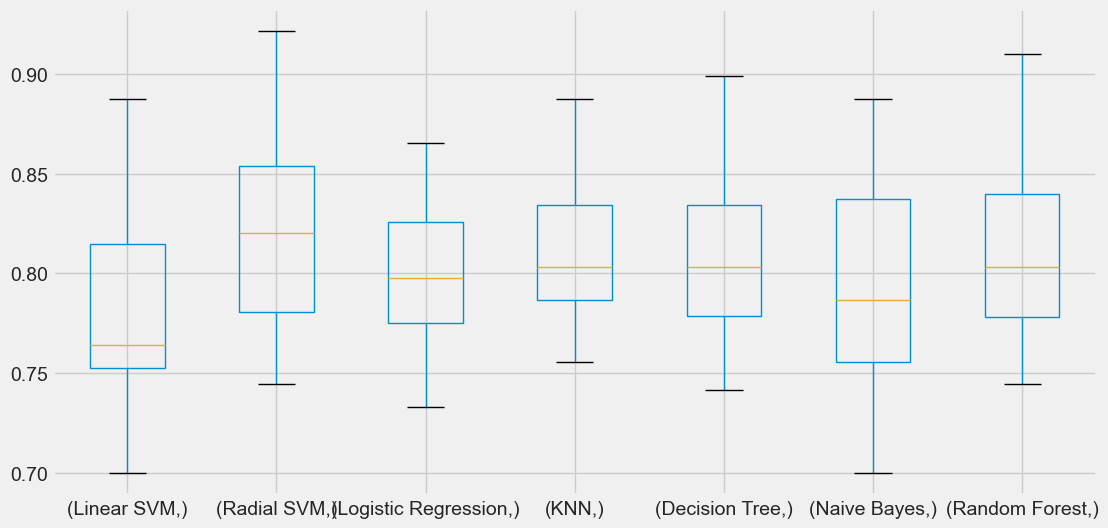

In [106]:
plt.subplots(figsize=(12,6))
box = pd.DataFrame(accuracy, index=[classifiers])
box.T.boxplot()

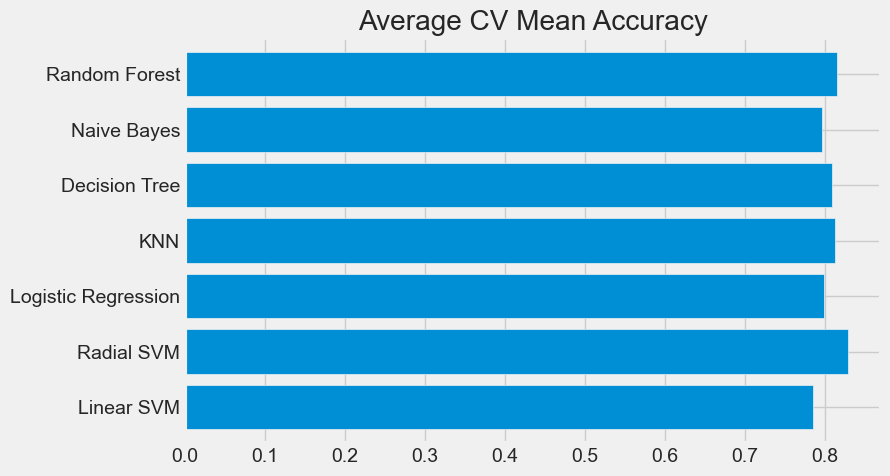

In [107]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.show()

## Confusion Matrix

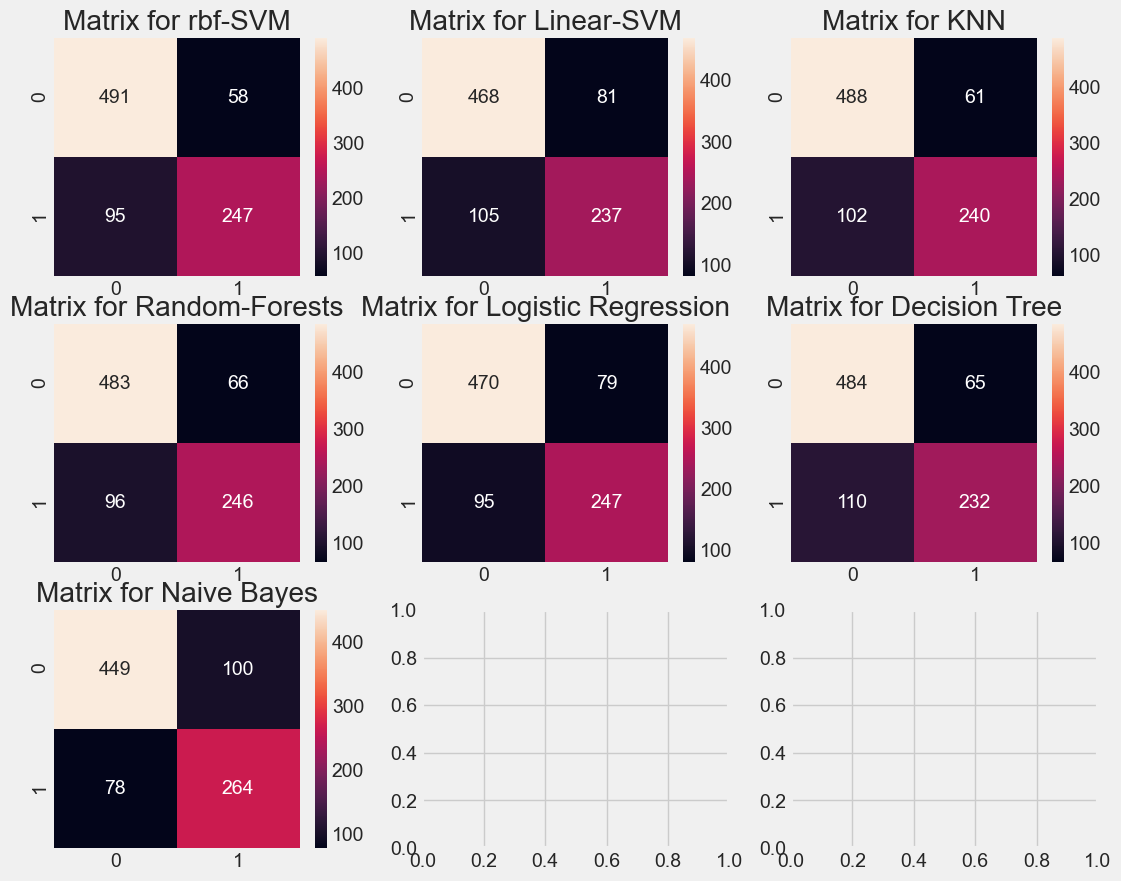

In [111]:
f, ax = plt.subplots(3,3, figsize=(12,10))

y_pred = cross_val_predict(svm.SVC(kernel='rbf'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,0], annot=True, fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')

y_pred = cross_val_predict(svm.SVC(kernel='linear'), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,1], annot=True, fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[0,2], annot=True, fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,0], annot=True, fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

y_pred = cross_val_predict(LogisticRegression(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,1], annot=True, fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

y_pred = cross_val_predict(DecisionTreeClassifier(), X, Y, cv=10)
sns.heatmap(confusion_matrix(Y, y_pred), ax=ax[1,2], annot=True, fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')

plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()